In [ ]:
!nvidia-smi

Sun Sep  5 22:00:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# !git clone https://github.com/dzryk/antarctic-captions.git
!git clone https://github.com/raunak-agarwal/antarctic-captions.git
%cd antarctic-captions/
!git clone https://github.com/openai/CLIP
!git clone https://github.com/dzryk/clip-grams.git

Cloning into 'antarctic-captions'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 80 (delta 41), reused 35 (delta 13), pack-reused 0
Unpacking objects: 100% (80/80), done.
/content/antarctic-captions
Cloning into 'CLIP'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 142 (delta 23), reused 33 (delta 15), pack-reused 91
Receiving objects: 100% (142/142), 8.82 MiB | 26.88 MiB/s, done.
Resolving deltas: 100% (63/63), done.
Cloning into 'clip-grams'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 58 (delta 29), reused 27 (delta 10), pack-reused 0
Unpacking objects: 100% (58/58), done.


In [ ]:
!mkdir data
!mkdir data/train
!mkdir data/val

In [ ]:
!tar xf /content/drive/MyDrive/CLIP\ Models/ADE20K\ Captions/ade20k-unsplit-pairs/train.tar -C data/train

In [ ]:
!tar xf /content/drive/MyDrive/CLIP\ Models/ADE20K\ Captions/ade20k-unsplit-pairs/val.tar -C data/val

In [ ]:
# !cp /content/drive/MyDrive/CLIP\ Models/ADE20K\ Captions/CLIP-BART/emb.npy emb.npy
# !cp /content/drive/MyDrive/CLIP\ Models/ADE20K\ Captions/CLIP-BART/grams.txt grams.txt
!cp /content/drive/MyDrive/CLIP\ Models/ADE20K\ Captions/CLIP-BART/ckpt.pt ckpt.pt

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 64 kB 2.8 MB/s 
     |████████████████████████████████| 919 kB 27.2 MB/s 
     |████████████████████████████████| 2.8 MB 76.0 MB/s 
     |████████████████████████████████| 829 kB 84.7 MB/s 
     |████████████████████████████████| 119 kB 70.4 MB/s 
     |████████████████████████████████| 282 kB 71.7 MB/s 
     |████████████████████████████████| 636 kB 66.3 MB/s 
     |████████████████████████████████| 1.3 MB 58.5 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 895 kB 76.9 MB/s 
     |████████████████████████████████| 3.3 MB 82.8 MB/s 
     |████████████████████████████████| 87 kB 7.8 MB/s 
     |████████████████████████████████| 8.4 MB 78.9 MB/s 
     |████████████████████████████████| 142 kB 80.7 MB/s 
     |████████████████████████████████| 294 kB 90.9 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=6645e995039555ec40af5f92c57bba243dc52f7f96a962044f9c611

In [ ]:
!mkdir outputs

In [ ]:
!ls 

ckpt.pt     data	      grams.txt  outputs	   trainer.py
CLIP	    dataset.py	      images	 README.md	   utils.py
clip-grams  download_coco.sh  LICENSE	 requirements.txt
coco.py     emb.npy	      model.py	 sampler.py


In [ ]:
!python3 trainer.py --datadir=outputs/ --train_datadir=data/train/ --dev_datadir=data/val \
--textfile=grams.txt --embfile=emb.npy --nworkers=12 \
--batch_size=32 --maxlen_enc=128 --maxlen_dec=77 --clip_model=RN50 --topk=25                                                                 

Downloading: 100% 26.0/26.0 [00:00<00:00, 23.8kB/s]
Downloading: 100% 1.60k/1.60k [00:00<00:00, 1.34MB/s]
Downloading: 100% 899k/899k [00:00<00:00, 2.11MB/s]
Downloading: 100% 456k/456k [00:00<00:00, 1.34MB/s]
Downloading: 100% 1.36M/1.36M [00:00<00:00, 2.61MB/s]
Downloading: 100% 1.60k/1.60k [00:00<00:00, 1.30MB/s]
Downloading: 100% 1.02G/1.02G [00:15<00:00, 64.1MB/s]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                         | Params
-----------------------------------------------------------
0 | perceiver | CLIP                         | 102 M 
1 | model     | BartForConditionalGeneration | 406 M 
-----------------------------------------------------------
73.7 K    Trainable params
508 M     Non-trainable params
508 M     Total params
2,033.194 Total estimated model params size (MB)
Validation sanity check: 0it [00:00, ?it/s]/usr/local/lib/python

In [ ]:
!ls outputs/lightning_logs/version_0/checkpoints/'-epoch=32-vloss=1.673.ckpt'

'-epoch=23-vloss=1.695.ckpt'  '-epoch=28-vloss=1.682.ckpt'
'-epoch=24-vloss=1.691.ckpt'  '-epoch=29-vloss=1.682.ckpt'
'-epoch=25-vloss=1.693.ckpt'  '-epoch=30-vloss=1.677.ckpt'
'-epoch=26-vloss=1.687.ckpt'  '-epoch=31-vloss=1.683.ckpt'
'-epoch=27-vloss=1.689.ckpt'  '-epoch=32-vloss=1.673.ckpt'


### Sampler

In [ ]:
# %cd antarctic-captions/
!python3 sampler.py --datadir=data/val/ \
--textfile=grams.txt --embfile=emb.npy --clip_model=RN50 --topk=25 \
--savedir=/content/drive/MyDrive/CLIP\ Models/ADE20K\ Captions/CLIP-BART/run2/ \
 --ckpt=outputs/lightning_logs/version_0/checkpoints/'-epoch=32-vloss=1.673.ckpt' \
 --num_beams=1 --do_sample=True --temperature=0.7 --top_p=0.9 --num_return_sequences=500 --batch_size=1

In this picture we can see a campground with a barbecue grill on the right side. We can also see wooden table, chairs, a wall with some text on it, some plants, trees, an umbrella, the sky, and few objects.
In this image I can see a vehicle, in the middle I could see the signboard and there is a building. At the bottom I cannot see any grass.
In this image I can see the bed, pillows, table and few objects. I could see some objects on the table. There is a fan on a stand and I am looking at the ceiling.
In this picture I can see a house with a plant. I could see the plants in the pot and in front of the flower pots. There is a table. On the table there are flowers and I am looking at the glass windows. In the background I
In this image there are two beds with pillows on it. There is a photo frame on the wall. On the left side of the image, there is an object on a table. In the background, we can see the curtain and a window.
In this image I can see there are golf balls, a person standin

In [ ]:
!cd ..

In [ ]:
# ! git clone https://github.com/facebookresearch/vizseq
# % cd vizseq
# ! pip install -e .
!pip install pycocoevalcap
# ! ls

     |████████████████████████████████| 104.3 MB 39 kB/s 


In [ ]:
ref = "/content/drive/MyDrive/CLIP Models/ADE20K Captions/CLIP-BART/run2/ref0.txt"
pred = "/content/drive/MyDrive/CLIP Models/ADE20K Captions/CLIP-BART/run2/preds.txt"
src = open(ref).readlines()
pred = open(pred).readlines()

len(src), len(pred)

(2000, 2000)

In [ ]:
import json
import string

p=string.punctuation
references = {}
for i, row in enumerate(src):
  references[i] = [row.translate(str.maketrans('', '', p))]

with open('src.json', 'w') as f:
  json.dump(references, f)

hypothesis = {}
for i, row in enumerate(pred):
  hypothesis[i] = [row.translate(str.maketrans('', '', p))]

with open('pred.json', 'w') as f:
  json.dump(hypothesis, f)

In [ ]:
# references

In [ ]:
!cat pred.json

{"0": ["In this picture we can see a campground with a barbecue grill on the right side We can also see wooden table chairs a wall with some text on it some plants trees an umbrella the sky and few objects\n"], "1": ["In this image I can see a vehicle in the middle I could see the signboard and there is a building At the bottom I cannot see any grass\n"], "2": ["In this image I can see the bed pillows table and few objects I could see some objects on the table There is a fan on a stand and I am looking at the ceiling\n"], "3": ["In this picture I can see a house with a plant I could see the plants in the pot and in front of the flower pots There is a table On the table there are flowers and I am looking at the glass windows In the background I\n"], "4": ["In this image there are two beds with pillows on it There is a photo frame on the wall On the left side of the image there is an object on a table In the background we can see the curtain and a window\n"], "5": ["In this image I can s

In [ ]:
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.spice.spice import Spice
def calc_scores(ref, hypo):
    """
    Code from https://www.programcreek.com/python/example/103421/pycocoevalcap.bleu.bleu.Bleu
    which uses the original Coco Eval API in python 3. It performs the BLEU 4 score.
    :param ref: dictionary of reference sentences (id, sentence)
    :param hypo: dictionary of hypothesis sentences (id, sentence)
    :return: score, dictionary of BLEU scores
    """
    scorers = [
        (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
        (Cider(), "Cider"),
        (Meteor(), "Meteor"),
        (Rouge(), "Rouge"),
        (Spice(), "Spice"),
    ]
    final_scores = {}
    for scorer, method in scorers:
        score, scores = scorer.compute_score(ref, hypo)
        print(method, score)
        if type(score) == list:
            for m, s in zip(method, score):
                final_scores[m] = s
        else:
            final_scores[method] = score
    return final_scores

In [ ]:
# calc_scores(references, hypothesis)

In [ ]:
!pip install sentence-transformers

     |████████████████████████████████| 85 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 33.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126710 sha256=a70022421ba945bb3610748d21d57aadae62d2634c4c086a032c4f3b8dc9ee9a
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
src_embeddings = model.encode(src)
pred_embeddings = model.encode(pred)

In [ ]:
src_embeddings

array([[-0.02919966,  0.00882626, -0.01791979, ...,  0.00185968,
         0.00235577, -0.02002681],
       [ 0.02854488, -0.08082537, -0.01435544, ..., -0.00990637,
        -0.00415788, -0.01250205],
       [-0.00083319,  0.00453048, -0.03595575, ..., -0.00301337,
         0.02765527, -0.02918243],
       ...,
       [-0.00874331, -0.01615747,  0.0023153 , ..., -0.01276089,
         0.0216634 , -0.0349024 ],
       [-0.03169247, -0.01478087, -0.00713065, ..., -0.04311265,
         0.02558438, -0.03251454],
       [-0.03779464, -0.01366867, -0.01978891, ...,  0.0417369 ,
         0.00297151, -0.0193827 ]], dtype=float32)

In [ ]:
from scipy.spatial import distance

distance.cosine(src_embeddings[1], pred_embeddings[1])

0.40737414360046387

In [ ]:
total_sim = 0
for i in range(len(src)):
  sim = distance.cosine(src_embeddings[i], pred_embeddings[i])
  print("\n\nSource: ", src[i], "\nPrediction: ", pred[i], "\nScore: ", sim)
  total_sim = total_sim + sim

Streaming output truncated to the last 5000 lines.
 
Score:  0.2237958312034607


Source:  In this image there is a table with the chairs. There is water and the grass. On the right side there are trees. In the background there are mountains. In the middle there is a tree with the white color flowers.
 
Prediction:  In this image we can see a wooden table, chairs, windows and a window. On the left side of the image there is a green grass and there are plants. At the bottom of this picture there may be water.
 
Score:  0.21517091989517212


Source:  In this image I can see buildings with cross symbols on the top. Also there is a clock , tree and in the background there is sky.
 
Prediction:  In this picture we can see a church. There is a man standing in front of the building. On the right side of this image we have a person sitting on the chair. We can also see the wall. At the bottom of
 
Score:  0.39923566579818726


Source:  In this image we can see buildings, windows, doors, stairs

In [ ]:
total_sim/len(src)

0.26009932134300473

In [ ]:
%cd antarctic-captions/

ckpt.pt     dataset.py	      LICENSE	   README.md	     utils.py
CLIP	    download_coco.sh  model.py	   requirements.txt
clip-grams  emb.npy	      outputs	   sampler.py
coco.py     grams.txt	      pred.json    src.json
data	    images	      __pycache__  trainer.py


In [ ]:
import argparse
import io
import numpy as np
import torch
import torch.nn as nn
import requests
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

from CLIP import clip
from PIL import Image
from pytorch_lightning.callbacks import ModelCheckpoint
from torchvision.utils import make_grid

import model
import utils
from pprint import pprint

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda:0


In [ ]:
# Helper functions
def fetch(url_or_path):
    if str(url_or_path).startswith('http://') or str(url_or_path).startswith('https://'):
        r = requests.get(url_or_path)
        r.raise_for_status()
        fd = io.BytesIO()
        fd.write(r.content)
        fd.seek(0)
        return fd
    return open(url_or_path, 'rb')

def load_image(img, preprocess):
    img = Image.open(fetch(img))
    return img, preprocess(img).unsqueeze(0).to(device)

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

def display_grid(imgs):
    reshaped = [F.to_tensor(x.resize((256, 256))) for x in imgs]
    show(make_grid(reshaped))
    
def clip_rescoring(args, net, candidates, x):
    textemb = net.perceiver.encode_text(
        clip.tokenize(candidates).to(args.device)).float()
    textemb /= textemb.norm(dim=-1, keepdim=True)
    similarity = (100.0 * x.float() @ textemb.T.float()).softmax(dim=-1)
    _, indices = similarity[0].topk(args.num_return_sequences)
    return [candidates[idx] for idx in indices[0]]

def loader(args):
    cache = []
    with open(args.textfile) as f:
        for line in f:
            cache.append(line.strip())
    cache_emb = np.load(args.embfile)
    net = utils.load_ckpt(args)
    net.cache = cache
    net.cache_emb = torch.tensor(cache_emb).to(args.device)
    preprocess = clip.load(args.clip_model, jit=False)[1]
    return net, preprocess
    
def caption_image(path, args, net, preprocess):
    captions = []
    img, mat = load_image(path, preprocess)
    table, x = utils.build_table(mat.to(device), 
                          perceiver=net.perceiver,
                          cache=net.cache,
                          cache_emb=net.cache_emb,
                          topk=args.topk,
                          return_images=True)
    print(x)
    table = net.tokenizer.encode(table[0], return_tensors='pt').to(device)
    out = net.model.generate(table,
                             do_sample=args.do_sample,
                             num_beams=args.num_beams,
                             temperature=args.temperature,
                             min_length=args.min_length,
                             max_length=args.max_length,
                             top_p=args.top_p,
                             repetition_penalty=args.repetition_penalty,
                             no_repeat_ngram_size=args.no_repeat_ngram_size,
                             num_return_sequences=args.num_return_sequences)
    candidates = []
    for seq in out:
        candidates.append(net.tokenizer.decode(seq, skip_special_tokens=True))
    captions = clip_rescoring(args, net, candidates, x[None,:])
    for c in captions[:args.display]:
        print(c)
    display_grid([img])
    return captions

In [ ]:
' '.join("this is a sentence".split()[:3])

'this is a'

In [ ]:
!ls outputs/lightning_logs/version_0/checkpoints/'-epoch=32-vloss=1.673.ckpt'

'-epoch=23-vloss=1.695.ckpt'  '-epoch=28-vloss=1.682.ckpt'
'-epoch=24-vloss=1.691.ckpt'  '-epoch=29-vloss=1.682.ckpt'
'-epoch=25-vloss=1.693.ckpt'  '-epoch=30-vloss=1.677.ckpt'
'-epoch=26-vloss=1.687.ckpt'  '-epoch=31-vloss=1.683.ckpt'
'-epoch=27-vloss=1.689.ckpt'  '-epoch=32-vloss=1.673.ckpt'


In [ ]:
# !cp ../outputs/lightning_logs/version_3/checkpoints/-epoch=32-vloss=1.702.ckpt \
# /content/drive/MyDrive/CLIP\ Models/ADE20K\ Captions/CLIP-BART/clip-pretrained-bart.ckpt

In [ ]:
# !rm /content/drive/MyDrive/CLIP\ Models/ADE20K\ Captions/CLIP-BART/clip-pretrained-bart.ckpt

In [ ]:
# !gsutil cp -r ../outputs/lightning_logs/version_3/checkpoints/-epoch=32-vloss=1.702.ckpt \
# /content/drive/MyDrive/CLIP\ Models/ADE20K\ Captions/CLIP-BART/clip-pretrained-bart.ckpt

In [ ]:
# Settings
# filedir='the-eye.eu/public/AI/models/antarctic-captions/'
args = argparse.Namespace(
    ckpt=f'outputs/lightning_logs/version_0/checkpoints/-epoch=32-vloss=1.673.ckpt',
    textfile=f'grams.txt',
    embfile=f'emb.npy',
    clip_model='RN50',
    topk=25,
    num_return_sequences=400,
    num_beams=1,
    temperature=0.7,
    top_p=0.92,
    display=5,
    do_sample=True,
    device=device,
    min_length=25,
    max_length=55,
    repetition_penalty=3.0,
    no_repeat_ngram_size=1,
)

In [ ]:
# Load checkpoint and preprocessor
net, preprocess = loader(args)

In [ ]:
# Images
img = 'https://images.unsplash.com/photo-1506744038136-46273834b3fb?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2100&q=80'
img2 = 'https://images.unsplash.com/photo-1546561892-65bf811416b9?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2100&q=80'
img3 = 'https://pbs.twimg.com/media/E7DyLY5WYAMu9km?format=png&name=small'
img4 = 'https://images.unsplash.com/photo-1580130379624-3a069adbffc5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=968&q=80'
img5 = 'https://images.unsplash.com/photo-1499781350541-7783f6c6a0c8?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2315&q=80'
img6 = 'https://images.unsplash.com/photo-1541701494587-cb58502866ab?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2100&q=80'
img7 = 'https://images.unsplash.com/photo-1602738328654-51ab2ae6c4ff?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1867&q=80'
img8 = 'https://images.unsplash.com/photo-1530025809667-1f4bcff8e60f?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=3640&q=80'
img9 = 'https://images.unsplash.com/photo-1587162146766-e06b1189b907?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2325&q=80'
img10 = 'https://images.unsplash.com/photo-1611974789855-9c2a0a7236a3?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2100&q=80'
img11 = 'https://images.unsplash.com/photo-1621981386829-9b458a2cddde?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2100&q=80'
img12 = 'https://thumbs.dreamstime.com/b/toronto-sign-nathan-phillips-square-view-night-canada-121955940.jpg'
img13 = 'https://i.imgur.com/dDYrREd.jpg'

tensor([[ 0.0239, -0.0095, -0.0232,  ..., -0.0152, -0.0095,  0.0004]],
       device='cuda:0')
In this image there are trees, mountains and in the background we can see sky. On top of it is a river with water flowing through at bottom right side which may be dark colored blue color. And here also some people have their tents on ground near to
In this image we can see a river and trees. There are mountains, plants with leaves on them in the foreground of which there is sky at right side also behind it that looks like clouds above us to be clear here.. In background I cannot find any people but
In this image I can see water flowing in the river. In front of it there are trees, rocks and mountains with some plants on them at both sides so far from me they look like mountain peaks to which we could also observe clouds through a window as well 
In this image we can see a river and trees. We also have some stones on the ground, in front of that there are mountains with clear blue sky at top 

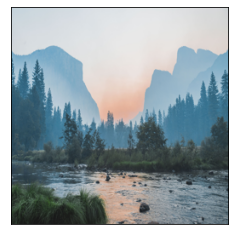

In [ ]:
# Generate captions! Running multiple times will give different results.
# If you get a GPU memory error, decrease 'num_return_sequences'. This will impact caption quality.
captions = caption_image(img, args, net, preprocess)
torch.cuda.empty_cache()

tensor([[ 0.0034, -0.0072, -0.0058,  ..., -0.0072,  0.0007,  0.0497]],
       device='cuda:0')
In this picture I can see the grass, a vehicle and some people are standing on it. In background there is sky with clouds in blue color at top of image which looks like an object might be flying around near me as well along from that we have few trees
In this image we can see vehicles, trees and the sky. In front of that there is a man sitting on an aircraft seat in white color blue colour vehicle with some other objects beside him also it looks like few plants are planted along side them as well besides those
In this image I can see two persons are flying on a motor vehicle and there is an object. There may be trees, grasslands in the background of my picture with clouds to it at top left side from which i could view sky through glasses. On either right
In this image I can see the grass, trees and a few vehicles on which there are some persons sitting. In front of me at one side it looks lik

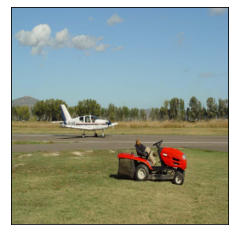

In [ ]:
# Generate captions! Running multiple times will give different results.
# If you get a GPU memory error, decrease 'num_return_sequences'. This will impact caption quality.
caption_image(img13, args, net, preprocess)
torch.cuda.empty_cache()

tensor([[ 0.0368, -0.0037, -0.0295,  ...,  0.0033,  0.0032, -0.0117]],
       device='cuda:0')
In this image, we can see a room with wooden walls and at the top of it there is sky. On both sides in that picture I could find black color objects on white background which are some kind object such as frames to be made from cloth or text printed
In the image I can see a wooden box on which there are some objects and in front of it, i could also observe other things. In background here is another black color object placed behind me with white hue colour walls attached to them at left side from right corner
In this image we can see a room and there is an object on the floor. On top of that, it looks like some objects are attached to wires in which also another photo frames was placed into black color box boxes with text written inside them at bottom left corner
In this image we can see a bed, at the top of it there are lights. At bottom and back side they have curtains on which some objects 

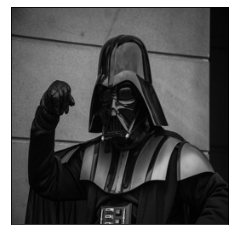

In [ ]:
# Generate captions! Running multiple times will give different results.
# If you get a GPU memory error, decrease 'num_return_sequences'. This will impact caption quality.
captions = caption_image(img2, args, net, preprocess)
torch.cuda.empty_cache()

tensor([[-0.0148, -0.0122, -0.0035,  ..., -0.0052,  0.0019, -0.0713]],
       device='cuda:0')
In this image, there are people standing and walking on the ground. In front of them we can see a screen with some images attached to it in which few objects have been placed around us along side that is looking like balloons at top right corner also behind those items
In this image there are people standing on the ground and some of them have balloons. There is a wall in front, few objects to which we can see paper with text written inside it (blue color) at top left side). On both sides I could find two
In this image we can see a person standing on the ground. On top of that, there are poles and some objects in blue color with text written inside which also has pictures printed onto it.. At bottom left corner at right side few people stand holding white colored balloons
In this image, I can see a group of people standing on the ground. In front there is an object and also at top right side 

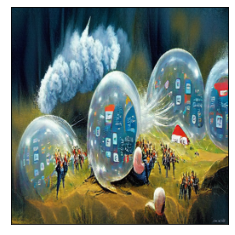

In [ ]:
# Generate captions! Running multiple times will give different results.
# If you get a GPU memory error, decrease 'num_return_sequences'. This will impact caption quality.
captions = caption_image(img3, args, net, preprocess)
torch.cuda.empty_cache()

tensor([[ 0.0041, -0.0113, -0.0258,  ...,  0.0173,  0.0318,  0.0787]],
       device='cuda:0')
In this picture we can see a person standing on the floor. In front of them there is an object, which looks like some sort in white color and it appears to be attached from paper or cloth with papers printed onto that text has blue background around us at left
In this image I can see a person standing on the floor. On top of that, there is some text written and it looks like in front to him we have few chairs arranged around his chair at an assembly room where he has another photo frame attached with cloth or
In this picture we can see a person standing in the background. At left side of image there is an object and at right top here it looks like some text written on paper, behind that also visible are several objects with banners attached to them which look similar from these
In this image I can see a person standing on the floor. In front of him, there is an umbrella and it looks like some

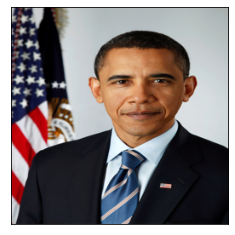

In [ ]:
# Generate captions! Running multiple times will give different results.
# If you get a GPU memory error, decrease 'num_return_sequences'. This will impact caption quality.
captions = caption_image(img4, args, net, preprocess)
torch.cuda.empty_cache()

tensor([[-0.0184, -0.0160, -0.0143,  ...,  0.0139,  0.0082, -0.0120]],
       device='cuda:0')
In this image, we can see a flagpole. In the background of that picture there is floor and walls with curtains on it in white color (color). At top side to bottom I could observe sky blue hue at which light might be visible through some clouds.
In this image we can see the flag. At top of it there is sky with clouds and a white color object in blue colour, on both sides few objects are visible at different shades to which one could be attached from other parts along side that also provided an umbrella
In this image I can see a flag on the roof. In front of that there is an object in white color and it looks like cloth, at bottom left side right corner i could also observe some objects inside black colors to be placed under sky which may look transparent
In this picture we can see the flagpole. In front of that there are some objects and a sky in blue color, it looks like clouds on top left si

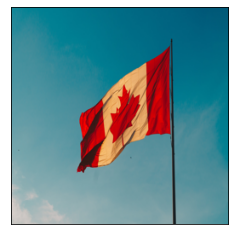

In [ ]:
# Generate captions! Running multiple times will give different results.
# If you get a GPU memory error, decrease 'num_return_sequences'. This will impact caption quality.
captions = caption_image(img8, args, net, preprocess)
torch.cuda.empty_cache()

tensor([[-0.0012, -0.0065,  0.0025,  ..., -0.0246,  0.0107, -0.0226]],
       device='cuda:0')
In this image I can see a building with metal rods and pillars. In the background, there is sky in blue color along which it looks like an island on water at bottom of right side that we could be looking through to sea below me.. At top left corner
In this image we can see a building. In the background of which there is sky with clouds and in that bottom area it looks like water at top left side, right front to middle floor also looking blue color through dark glass windows on either sides as well together few
In the center of this image there is a building. In front we can see trees, water and sky in blue color are visible at bottom right side on top left corner here it looks like an old wooden structure with lights attached to roof rack beside that wall also having
In the image I can see a building. In front of that, there is water and in background it looks like an ocean with clouds on top

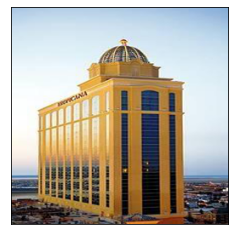

In [ ]:
i = "data/val/ADE_val_00001231.jpg"

# Generate captions! Running multiple times will give different results.
# If you get a GPU memory error, decrease 'num_return_sequences'. This will impact caption quality.
captions = caption_image(i, args, net, preprocess)
# torch.cuda.empty_cache()

In [ ]:
# torch.cuda.empty_cache()